# Just for testing random things

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from src.utils.misc.numerical import count_monotonic_group_lengths, find_monotonic_group_idxs, is_within_range
from src.utils.misc.string_handling import string_to_tuple_list
from src.utils.results.analytics.naming import get_true_interaction_cols
from src.utils.misc.type_handling import flatten_listlike, get_first_elements
from src.utils.misc.string_handling import prettify_keys_for_label
from tests_local.shared import CONFIG
from explanations.data_enhancing import enhance_data


2023-04-21 02:56:44.619368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 02:56:44.790612: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-21 02:56:45.405332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wadh6511/miniconda3/lib/
2023-04-21 02:56:45.405402: W tensorflow/compiler/xla/s

In [3]:
fn = '../data/ensemble_mutation_effect_analysis/2023_04_11_192013/summarise_simulation/tabulated_mutation_info.csv'
info = pd.read_csv(fn)

In [4]:
info, infom, info_summ = enhance_data(info) 

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/home/wadh6511/Kode/gene-circuit-glitch-prediction/explanations/data_enhancing.py:72: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  mutation_log = grouped[numerical_cols].apply(
/home/wadh6511/Kode/gene-circuit-glitch-prediction/explanations/data_enhancing.py:118: FutureWa

Grouping

In [5]:
infom[(infom['idx'] != 'energies_1-0') & (infom['idx'] != 'energies_2-0') & (infom['idx'] != 'energies_2-1')].pivot_table('binding_rates_dissociation', ['idx'], ['circuit_name', 'mutation_num'])

circuit_name toy_mRNA_circuit_10000                                          \
mutation_num                     0         1         3         5         10   
idx                                                                           
energies_0-0               0.452640  0.439349  0.415579  0.433828  0.397140   
energies_0-1               0.452640  0.434494  0.413288  0.434558  0.416006   
energies_0-2               0.016724  0.130656  0.222033  0.272847  0.204591   
energies_1-1               0.452640  0.433883  0.415300  0.434527  0.452640   
energies_1-2               0.032168  0.118689  0.312483  0.275531  0.189439   
energies_2-2               0.452640  0.435850  0.452640  0.452640  0.396939   

circuit_name           toy_mRNA_circuit_10043                                \
mutation_num        15                     0         1         3         5    
idx                                                                           
energies_0-0  0.452640               0.452640  0.444340  0.415716  0.420520   
energies_0-1  0.415987               0.080673  0.119423  0.310457  0.328651   
energies_0-2  0.217626               0.010360  0.048401  0.270665  0.216945   
energies_1-1  0.415461               0.452640  0.452640  0.433815  0.434291   
energies_1-2  0.242609               0.452640  0.452640  0.438294  0.452640   
energies_2-2  0.435392               0.452640  0.452640  0.399255  0.416259   

circuit_name  ... toy_mRNA_circuit_36028                                \
mutation_num  ...                     3         5         10        15   
idx           ...                                                        
energies_0-0  ...               0.433927  0.433836  0.415527  0.397374   
energies_0-1  ...               0.290414  0.276553  0.227748  0.278028   
energies_0-2  ...               0.289905  0.206088  0.214142  0.234211   
energies_1-1  ...               0.415099  0.433795  0.434456  0.452640   
energies_1-2  ...               0.398761  0.452640  0.452640  0.452640   
energies_2-2  ...               0.418398  0.434819  0.452640  0.396465   

circuit_name toy_mRNA_circuit_36038                                          \
mutation_num                     0         1         3         5         10   
idx                                                                           
energies_0-0               0.452640  0.452640  0.433858  0.418732  0.452640   
energies_0-1               0.016808  0.069566  0.293393  0.258684  0.178210   
energies_0-2               0.452640  0.452640  0.452640  0.452640  0.434161   
energies_1-1               0.452640  0.452640  0.433935  0.434535  0.418258   
energies_1-2               0.049682  0.183481  0.282920  0.275873  0.210699   
energies_2-2               0.452640  0.452640  0.452640  0.452640  0.434614   

circuit_name            
mutation_num        15  
idx                     
energies_0-0  0.452640  
energies_0-1  0.233918  
energies_0-2  0.441802  
energies_1-1  0.452640  
energies_1-2  0.245846  
energies_2-2  0.452640  

[6 rows x 6000 columns]

In [6]:
# grp_mutations = infom[(infom['idx'] != 'energies_1-0') & (infom['idx'] != 'energies_2-0') & (infom['idx'] != 'energies_2-1')].pivot_table('binding_rates_dissociation', ['idx'], ['circuit_name', 'mutation_num']).T.to_numpy()
grp_mutations = infom.pivot_table('binding_rates_dissociation', ['sample_name', 'mutation_name', 'idx'], 'circuit_name').T.to_numpy()
scaled_data = StandardScaler().fit_transform(grp_mutations)


In [7]:
# data = info[(info['sample_name'] == 'RNA_1')].dropna(axis=1)
# # data = data[np.abs(data[numerical_cols]) < 1e11]
# d = data[['sensitivity_wrt_species-6', 'precision_wrt_species-6']]
# scaled_data_sp = StandardScaler().fit_transform(d)

## UMAP

In [8]:
reducer = umap.UMAP(n_components=2, transform_seed=42)
# UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
#      n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
embedding = reducer.fit_transform(grp_mutations)
# embedding = reducer.embedding_
embedding.shape

(1000, 2)

In [9]:
def visualise_embedding(embedding_matrix, i=0, j=1):
    for h in ['frac_muts_in_binding_site', 'binding_sites_groups', 'num_interacting_all', 'num_interacting', 'num_self_interacting', 'sensitivity_wrt_species-6' + '_logm', 'precision_wrt_species-6' + '_logm', 'RMSE', 'fold_change' + '_logm', 'overshoot' + '_logm']:
        hue = [
            infom.groupby(['circuit_name']).agg({h: 'mean'}).to_numpy().squeeze(),
            infom.groupby(['circuit_name']).agg({h: 'std'}).to_numpy().squeeze(),
            infom.groupby(['circuit_name']).agg({h: lambda x: np.std(x) / np.where(np.mean(x) != 0, np.mean(x), 1)}).to_numpy().squeeze()
        ]
        if h in ['sensitivity_wrt_species-6', 'precision_wrt_species-6']:
            hue = [np.log(x) for x in hue]

        plt.figure(figsize=(28, 8))
        ax = plt.subplot(1,3,1)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[0]
        )
        plt.legend(title=h + '_mean')
        plt.ylabel(f'UMAP {j}')
        ax = plt.subplot(1,3,2)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[1]
        )
        plt.xlabel(f'UMAP {i}')
        plt.legend(title=h + '_std')
        ax = plt.subplot(1,3,3)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[2]
        )
        plt.legend(title=h + '_std_normed_by_mean')

        plt.gca().set_aspect('equal', 'datalim')
        plt.suptitle('UMAP projection of the dataset', fontsize=24);

IndexError: index 2 is out of bounds for axis 1 with size 2

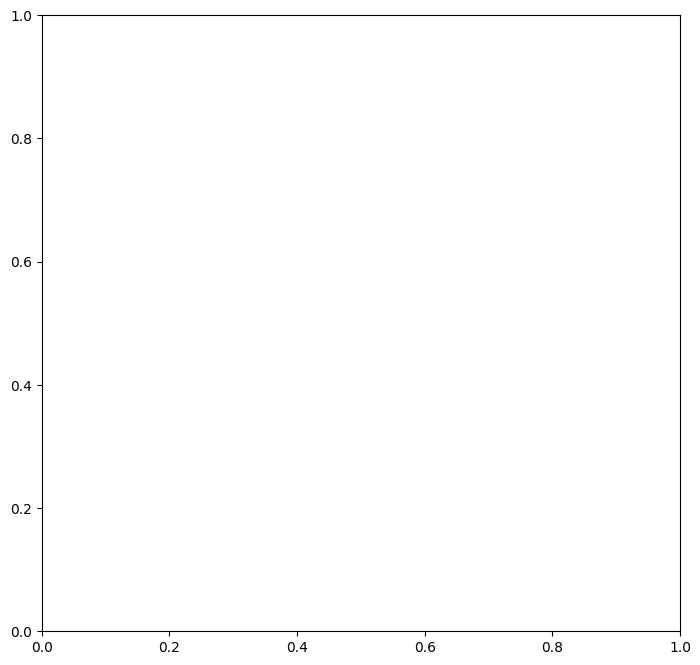

In [10]:
visualise_embedding(embedding, 0, 2)